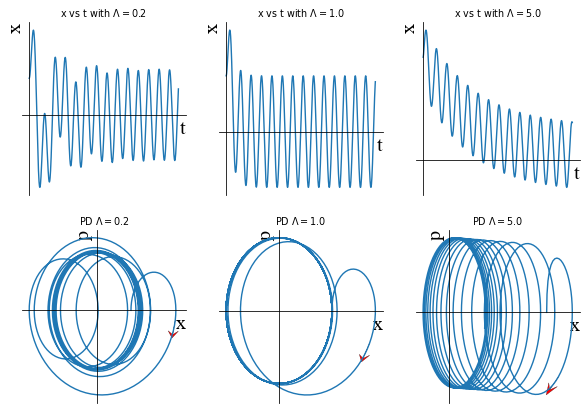

In [1]:
from scipy.integrate import odeint
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.style as psl
psl.use('seaborn-paper')

b_vec = np.array([0.2, 1.0, 5.0])
wid_vec = np.array([0.3, 0.2, 0.1])
def deri(xvec, time, b, w0, w, f):
    dx = xvec[1]
    d2x = f*np.cos(w*time)-2*b*xvec[1]-w0**2*xvec[0]
    return dx, d2x

xinit = (1, 0)
time_vec = np.linspace(0, 30, 1000)
fig, ax = plt.subplots(2, 3, figsize=(10, 7))

for i in range(2):
    for j in range(3):
        ax[i, j].spines['right'].set_color('none')
        ax[i, j].spines['top'].set_color('none')
        ax[i, j].spines['left'].set_position(('data', 0))
        ax[i, j].spines['bottom'].set_position(('data', 0))
        ax[i, j].set_yticks([])
        ax[i, j].set_xticks([])
font2 = {'family' : 'Times New Roman','weight' : 'normal','size' : 20,}    
    
for i in range(3):
    xarr = odeint(deri, xinit, time_vec, args=(b_vec[i], 1, 3, 10))
    ax[0, i].plot(time_vec, xarr[:, 0])
    ax[1, i].plot(xarr[:,0], xarr[:,1])
    ax[1, i].arrow(xarr[30, 0], xarr[30, 1], xarr[32, 0]-xarr[30, 0], xarr[32, 1]-xarr[30, 1], fc='r', overhang=0.5, head_width = wid_vec[i])
    ax[0, i].set_title(r'x vs t with $\Lambda='+str(b_vec[i])+'$')
    ax[1, i].set_title(r'PD $\Lambda='+str(b_vec[i])+'$')
    ax[0, i].set_xlabel('t', font2, horizontalalignment='right', position=(1, -0.2))
    ax[0, i].set_ylabel('x', font2, horizontalalignment='right', position=(-0.2, 1))
    ax[1, i].set_xlabel('x', font2, horizontalalignment='right', position=(1, -0.2))
    ax[1, i].set_ylabel('p', font2, horizontalalignment='right', position=(-0.2, 1))

plt.show()
